## Necessary imports

In [2]:
import pandas as pd
pd.options.display.max_columns = 999
from itertools import product
import numpy as np
import os 
import sys
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
from matplotlib import rcParams

from scipy.stats import binned_statistic_2d
from astropy.table import Table
from astropy.table import vstack
from astropy.table import Column

import datetime

In [32]:
import matplotlib.pyplot as plt
from matplotlib import rcParams      
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 20

### Read in DeepSource files

#### NCSA: 

In [10]:
# "Primary" sources with subset of 10 columns x 5474350 rows
fname1 = '../raw_data/repo_fls/DeepSourceNCSA_i_lt235_narrow.csv.gz'
ds_radec1 = Table.read(fname1,format='csv')

In [18]:
# Because of having a parent with i psfMag < 17,  we remove 585920 objects, 
# leaving 4888430 objects 
good_sources = np.load('../raw_data/repo_fls/NCSA_source_without_bright_parent.npy')
mask_keep = np.in1d(ds_radec1['deepSourceId'].data , good_sources)
ds_radec_k1 = ds_radec1[mask_keep]

#### IN2P3 : 

In [21]:
# "Primary" sources with subset of 10 columns x 4998901  rows 
fname2 = '../raw_data/repo_fls/DeepSourceIN2P3_i_lt235_narrow.csv.gz'
ds_radec2 = Table.read(fname2,format='csv')

In [22]:
# Because of having a parent with i psfMag < 17,  we remove  395970 objects, 
# leaving 4602931 objects 
good_sources = np.load('../raw_data/repo_fls/IN2P3_source_without_bright_parent.npy')
mask_keep = np.in1d(ds_radec2['deepSourceId'].data , good_sources)
print(np.sum(mask_keep))
ds_radec_k2 = ds_radec2[mask_keep]

4602931


These are all sources that were used as seeds for forced photometry : there is no color information here , we just display the location on the sky of all the primary detections that had parents brighter than 17 iPsfMag, that were used as seeds of forced photometry 

In [57]:
ds_radec_k1

deepSourceId,parentDeepSourceId,deepCoaddId,ra,decl,psfMag,psfMagSigma,tract,patch,detect_is_primary
int64,int64,int64,float64,float64,float64,float64,int64,str6,int64
217773674667705145,-1,1622540315,319.919106521,-0.629258761641,19.3365733978,0.0132534634118,3,"182,3",1
217773674667705156,-1,1622540315,320.001260915,-0.628663976377,22.2270291821,0.0456157633985,3,"182,3",1
217773674667705160,-1,1622540315,319.881800557,-0.62852111211,21.1712935134,0.0211048472204,3,"182,3",1
217773674667705162,-1,1622540315,320.003983392,-0.628222056057,19.2847538921,0.0132271311692,3,"182,3",1
217773674667705163,-1,1622540315,319.911801519,-0.628503823364,21.4896162824,0.0256776712856,3,"182,3",1
217773674667705165,-1,1622540315,319.846006314,-0.628477132558,23.4411420958,0.132651289043,3,"182,3",1
217773674667705169,-1,1622540315,319.958190017,-0.628117120252,22.8405273551,0.0764499766826,3,"182,3",1
217773674667705171,-1,1622540315,320.005971228,-0.628042166425,22.4837924606,0.0565464884535,3,"182,3",1
217773674667705177,-1,1622540315,319.940607025,-0.627714476451,22.8920143091,0.0807349645486,3,"182,3",1


In [66]:
# combine NCSA and IN2P3 into one Table : hstack ...
ds = vstack([ds_radec_k1, ds_radec_k2])
print(len(ds))

9491361


In [67]:
# Subsample just for plotting ...
data = ds[::4]
print(len(data))

2372841


## Plotting ra,dec based on DeepSource files 

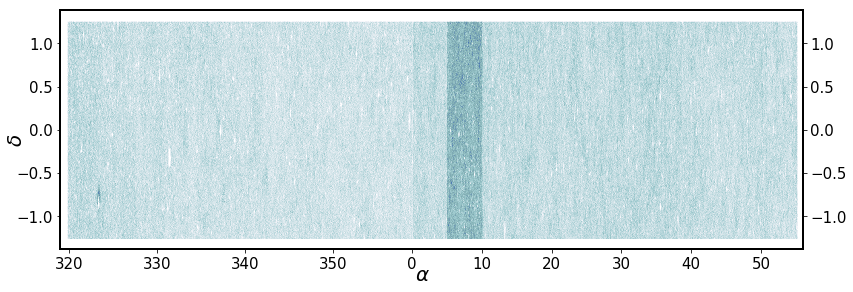

In [54]:
%matplotlib inline 

fig = plt.figure(figsize=(12,4 ))

ax = dict()
number_of_rows  = 1 
number_of_columns = 19  # because I have 320:360, and then 0:55 degrees, 
# which in total spans 
# 40 on the left,  and 55 on the right , 
# 40:55 = 8:11,  8+11 = 19 will give the right aspect ratio 
gs = gridspec.GridSpec(number_of_rows,  number_of_columns)
#ax = plt.subplot(gs[rowspan, colspan])
ax[0] = plt.subplot(gs[:, :9])  # span all rows but the last one (bottom), and first 5 col
ax[1] = plt.subplot(gs[:, 9:])  # span all rows but the last one (bottom), and last 5 cols

dotsize = 0.01

# left part 
m = data['ra'] > 60
ax[0].scatter(data['ra'][m], data['decl'][m], lw=0, s=dotsize)

ax[0].yaxis.set_ticks_position('left')
xticks = ax[0].get_xticks()
ax[0].set_xticks(xticks[:-1])
ax[0].set_xlim(319, 359)

# right part 
m = data['ra'] < 60
ax[1].scatter(data['ra'][m], data['decl'][m], lw=0, s=dotsize)
ax[1].set_xlim(0,56)

ax[1].spines['left'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].yaxis.set_ticks_position('right')

# make labels through figure rather than axs... 
Xlabel = r'$\alpha$'
Ylabel = r'$\delta$'
fig.text(0.5, 0.03, Xlabel, ha='center', va='center', fontsize=20)
fig.text(0.03, 0.5, Ylabel, ha='center', va='center', rotation='vertical', fontsize=20)

fig.subplots_adjust(wspace=0, hspace=0.36, left=0.08, right=0.94, bottom=0.12, top=0.95)
plt.savefig('../data_products/Fig_ra_dec/Fig_radec_test_all_iPsfMag_seeds.png')

### Illustrate Extendedness...

In [ ]:
# Load extendedness info ....
fname = '../raw_data/repo_fls/DeepSourceNCSA_i_lt235_extendedness.csv.gz'
ext1= Table.read(fname, format='csv')

fname = '../raw_data/repo_fls/DeepSourceIN2P3_i_lt235_extendedness.csv.gz'
ext2= Table.read(fname, format='csv')

ext = vstack([ext1, ext2])

To do that we need the full version of DeepSource files , which have more information about each detection...  ( **deepSourceId**,parentDeepSourceId,deepCoaddId, **filterId**,ra,decl,raVar,declVar,radeclCov, x,y,xVar,yVar,xyCov,**psfFlux**,psfFluxSigma, apFlux,apFluxSigma,**modelFlux**,modelFluxSigma, instFlux,instFluxSigma,apCorrection,shapeIx, shapeIy,shapeIxVar,shapeIyVar,shapeIxIyCov, shapeIxx,shapeIyy,shapeIxy,shapeIxxVar, shapeIyyVar,shapeIxyVar,shapeIxxIyyCov, shapeIxxIxyCov,shapeIyyIxyCov,**extendedness**, flagNegative,flagBadMeasCentroid,flagPixEdge, flagPixInterpAny,flagPixInterpCen, flagPixSaturAny,flagPixSaturCen, flagBadPsfFlux,flagBadApFlux, flagBadModelFlux,flagBadInstFlux, flagBadCentroid,flagBadShape, detect_is_primary,tract,patch, fluxMag0,fluxMag0Sigma,psfFluxCal,psfFluxCalSigma,**psfMag**,psfMagSigma ) 

In [81]:
# Start by reading not all rows ..
fname = '../raw_data/repo_fls/DeepSourceNCSA_i_lt235.csv.gz'
ds1_df = pd.read_csv(fname, compression='gzip',  nrows=1e6 )
ds1 = Table.from_pandas(ds1_df)

In [83]:
ds1[:4]

deepSourceId,parentDeepSourceId,deepCoaddId,filterId,ra,decl,raVar,declVar,radeclCov,x,y,xVar,yVar,xyCov,psfFlux,psfFluxSigma,apFlux,apFluxSigma,modelFlux,modelFluxSigma,instFlux,instFluxSigma,apCorrection,shapeIx,shapeIy,shapeIxVar,shapeIyVar,shapeIxIyCov,shapeIxx,shapeIyy,shapeIxy,shapeIxxVar,shapeIyyVar,shapeIxyVar,shapeIxxIyyCov,shapeIxxIxyCov,shapeIyyIxyCov,extendedness,flagNegative,flagBadMeasCentroid,flagPixEdge,flagPixInterpAny,flagPixInterpCen,flagPixSaturAny,flagPixSaturCen,flagBadPsfFlux,flagBadApFlux,flagBadModelFlux,flagBadInstFlux,flagBadCentroid,flagBadShape,detect_is_primary,tract,patch,fluxMag0,fluxMag0Sigma,psfFluxCal,psfFluxCalSigma,psfMag,psfMagSigma
int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,str6,float64,float64,float64,float64,float64,float64
217773674667705145,-1,1622540315,3,319.919106521,-0.629258761641,7.16906951344e-06,6.96464815466e-06,-7.55789680876e-13,365279.849813,5720.58080278,4.57219575765e-05,4.44075194537e-05,--,1154.63878343,3.86742320128,1289.33192523,8.0033975115,1225.80166899,3.36805255049,1192.0322137,6.05451836273,1.00044835,1309.85371464,29.5833999168,--,--,--,1.40256908882,1.5999468991,0.0110923771322,0.000202997995075,0.000115788876428,0.000264152273303,--,--,--,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,3,"182,3",62672280816.2,735670244.422,6.68914547211e-28,8.16536690795e-30,19.3365733978,0.0132534634118
217773674667705156,-1,1622540315,3,320.001260915,-0.628663976377,0.0012270785933,0.00115767318346,-1.29240814208e-10,364532.991684,5725.98761575,0.0078258998692,0.00738147925586,--,80.5867845013,3.25091449952,67.9312318254,7.7657394625,86.0351093841,3.39004493332,91.1375547327,5.2001722924,1.00046861,562.993516149,35.0070313622,--,--,--,1.70264699349,1.69380920256,-0.0713100875146,0.037752866745,0.0188115630299,0.0373619608581,--,--,--,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,"182,3",62672280816.2,735670244.422,4.66861786038e-29,1.96145773517e-30,22.2270291821,0.0456157633985
217773674667705160,-1,1622540315,3,319.881800557,-0.62852111211,0.000155209511753,0.000128868148929,-1.63435689543e-11,365618.994934,5727.28630365,0.000989874708466,0.000821680645458,--,213.087559185,3.30153416386,200.714185299,7.8169920111,212.205312746,3.14746303668,210.9444656,4.73963078905,1.0005151,1648.99958769,36.2914348336,--,--,--,1.35031232709,1.241000021,0.0183829203253,0.00368197844364,0.0016922961222,0.00310997106135,--,--,--,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,"182,3",62672280816.2,735670244.422,1.23447583967e-28,2.39960902836e-30,21.1712935134,0.0211048472204
217773674667705162,-1,1622540315,3,320.003983392,-0.628222056057,6.38618696654e-06,5.90995701026e-06,-6.72146046572e-13,364508.241889,5730.00483154,4.07289735449e-05,3.7682682887e-05,--,1211.0830986,3.94809468633,1153.28866025,7.96440967634,1211.47072237,3.22178247097,1206.67767823,6.02719258686,1.00045335,538.24700205,39.0121442264,--,--,--,1.38478849637,1.32676430447,0.00571667077499,0.000191370287212,9.16774588404e-05,0.000175669018063,--,--,--,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,3,"182,3",62672280816.2,735670244.422,7.01614317973e-28,8.54751326641e-30,19.2847538921,0.0132271311692


The problem : it appears that the DeepSource  files do not have  modelMag.... 
I found in https://lsst-web.ncsa.illinois.edu/~yusra/catalogsS13/  the file  iCoaddPhotometryAll.csv  that I used for that before (S13Agg_first_look), but I have no idea how it was made -  need to ask Yusra! 

In [84]:
# check that file out ...
# it has 16 mln rows !!! 
fname = '../raw_data/repo_fls/iCoaddPhotometryAll.csv'
#coadd_df = pd.read_csv(fname, rows=1e6)
coadd = Table.read(fname, format='csv')

(array([  5.65100000e+03,   0.00000000e+00,   0.00000000e+00,
          1.71290000e+04,   2.24558000e+05,   1.64035500e+06,
          1.36136980e+07,   1.01811500e+06,   5.67000000e+02,
          2.00000000e+01]),
 array([  0.        ,   3.64583653,   7.29167306,  10.93750959,
         14.58334613,  18.22918266,  21.87501919,  25.52085572,
         29.16669225,  32.81252878,  36.45836532]),
 <a list of 10 Patch objects>)

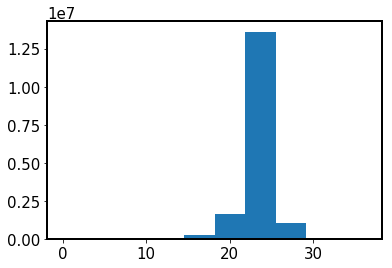

In [87]:
# Ok, I see : it has all photometry  for NCSA ... 
plt.hist(coadd['iPsfMag'].data)


In [89]:
# I believe it is for NCSA because if I just limit on  
# i < 23.5, I get an IDENTICAL  number of objects as in
# DeepSourceNCSA_i_lt235
mask = coadd['iPsfMag'].data <23.5
np.sum(mask)

5474350

In [ ]:
# subsample a bit ...
coadd_subsampled = coadd[mask][::4]

In [99]:
# merge in extendedness info by deepSourceId ...
coadd_data = join(coadd_subsampled, ext1, join_type='left', keys='deepSourceId')

In [105]:
len(coadd_data)

1370001

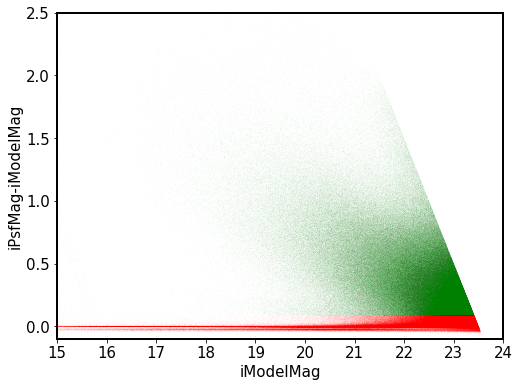

In [106]:
# Print iPsfMag   vs    iPsfMag - iModelMag  ,  and color by extendness 
%matplotlib inline

# This creates a mapping:  if extendedness =0 , color = red,  
# if extendedness =1,  color = green 
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['red', 'green'])

fig,ax  = plt.subplots(1,1,figsize=(8,6))
ax.set_ylabel('iPsfMag-iModelMag', fontsize=15)
ax.set_xlabel('iModelMag', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xlim(15,24)
ax.set_ylim(-0.1,2.5)
ax.scatter(coadd_data['iModelMag'],  coadd_data['iPsfMag']-coadd_data['iModelMag'], 
           s=0.02, c=coadd_data['extendedness'], cmap=cmap,lw = 0)
plt.savefig('../data_products/Fig_extendedness_psf_vs_model_mag_NCSA.png', 
           bbox_inches='tight')
plt.show()

In [124]:
bin_start = np.arange(21,24,0.5)
bin_end = bin_start+0.5
for s,e in zip(bin_start, bin_end) : 
    print(s,e)
    
bin_start = np.arange(21,24,0.5)
bin_end = bin_start+0.5

for i in range(6):
    print('Range iModelMag %.1f to %.1f' %(bin_start[i], bin_end[i]))

21.0 21.5
21.5 22.0
22.0 22.5
22.5 23.0
23.0 23.5
23.5 24.0
Range iModelMag 21.0 to 21.5
Range iModelMag 21.5 to 22.0
Range iModelMag 22.0 to 22.5
Range iModelMag 22.5 to 23.0
Range iModelMag 23.0 to 23.5
Range iModelMag 23.5 to 24.0


Range iModelMag 21.0 to 21.5
122570
Range iModelMag 21.5 to 22.0
169229
Range iModelMag 22.0 to 22.5
229180
Range iModelMag 22.5 to 23.0
285783
Range iModelMag 23.0 to 23.5
196946
Range iModelMag 23.5 to 24.0
996


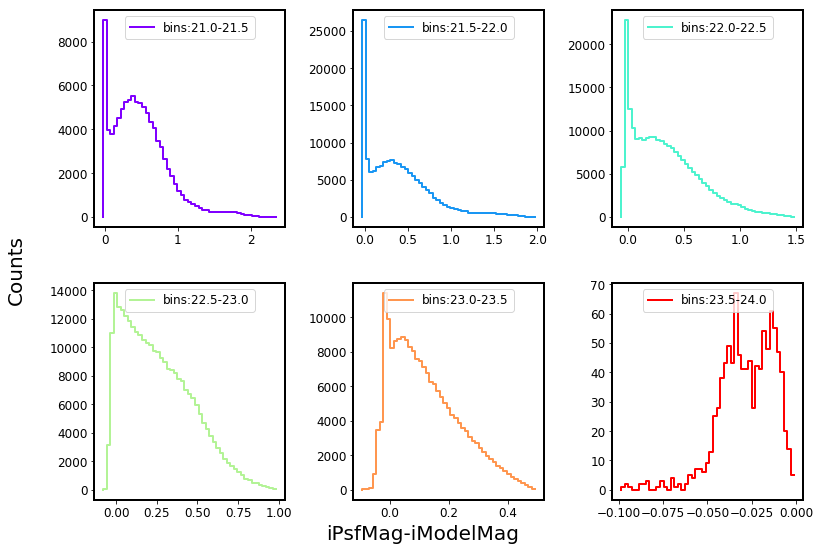

In [141]:
# Make vertical cuts in iModelMag ...


from matplotlib.pyplot import cm 
n = 6
color=iter(cm.rainbow(np.linspace(0,1,n)))

xlim = [-0.1,2.5]

iModel = coadd_data['iModelMag']
iPsf = coadd_data['iPsfMag'] 

mask_y = ((iPsf-iModel) < xlim[1]) * ((iPsf-iModel) > xlim[0])
nbins=50
fig,axs = plt.subplots(2,3,  figsize=(12,8),sharex = False)
ax = np.ravel(axs)

bin_start = np.arange(21,24,0.5)
bin_end = bin_start+0.5

for i in range(6):
    print('Range iModelMag %.1f to %.1f' %(bin_start[i], bin_end[i]))
    mask_bin = (bin_start[i] < iModel) * (iModel < bin_end[i])
    mask = mask_bin * mask_y 
    print(np.sum(mask))
    
    hist, bin_edges = np.histogram(iPsf[mask]-iModel[mask], bins=nbins, density=False)
    bin_cen = (bin_edges[:-1] + bin_edges[1:])/2
    hist[0] = 0
    ax[i].plot(bin_cen, hist, ls='steps',  lw=2, color=next(color),
                label='bins:'+str(bin_start[i])+'-'+str(bin_end[i]))
    ax[i].legend(fontsize=12, loc='upper center')
    ax[i].tick_params(axis='both', which='major', labelsize=12)
    #if i in [0,1,2] :
    #    ax[i].set_xlim(xlim[0], xlim[1])
    #if i is 3 :  
    #    ax[i].set_xlim(xlim[0],0.9)
    #if i is 4: 
    #    ax[i].set_xlim(xlim[0],0.6)
fig.text(0.5, 0.04, 'iPsfMag-iModelMag', ha='center', va='center',fontsize=20)
fig.text(0.03, 0.5, 'Counts', ha='center', va='center', rotation='vertical',fontsize=20)

fig.subplots_adjust(wspace=0.36, hspace=0.26, left=0.12, right=0.94, 
                    bottom=0.10, top=0.95)
plt.savefig('../data_products/Fig_extendedness_marginalize_NCSA.png')

In [75]:
from astropy.table import join
ds_ext = join(ds, ext, join_type='left', keys='deepSourceId')

In [80]:
%matplotlib inline
d = ds_ext[::4]
plt.scatter(d)

deepSourceId,parentDeepSourceId,deepCoaddId,ra,decl,psfMag,psfMagSigma,tract,patch,detect_is_primary,col0,extendedness
int64,int64,int64,float64,float64,float64,float64,int64,str6,int64,int64,int64
1398579193184462,-1,10420227,54.9925324119,-1.2566088761,21.6001578143,0.0483682987977,0,"159,0",1,2430271,1
1398579193184465,-1,10420227,54.9768364421,-1.25617853106,17.3310589842,0.00880524869559,0,"159,0",1,2430272,0
1398579193184466,-1,10420227,55.1098449455,-1.25615171824,22.8951321063,0.152698468559,0,"159,0",1,2430273,0
1398579193184468,-1,10420227,54.907857988,-1.25617755045,23.091513565,0.18004536336,0,"159,0",1,2430274,1
1398579193184474,-1,10420227,54.9639577748,-1.25586562807,22.6704978728,0.124818326799,0,"159,0",1,2430275,1
1398579193184475,-1,10420227,54.9238571734,-1.25572623268,22.2495911891,0.0840452781006,0,"159,0",1,2430276,1
1398579193184477,-1,10420227,55.0148178675,-1.25556459641,20.8680780806,0.0264469518425,0,"159,0",1,2430277,0
1398579193184478,-1,10420227,55.0296490501,-1.25479519399,15.535360046,0.00863188483068,0,"159,0",1,2430278,0
1398579193184480,-1,10420227,54.9686892566,-1.25524262013,19.6639795831,0.0125452750637,0,"159,0",1,2430279,0


In [72]:
ds.colnames

['deepSourceId',
 'parentDeepSourceId',
 'deepCoaddId',
 'ra',
 'decl',
 'psfMag',
 'psfMagSigma',
 'tract',
 'patch',
 'detect_is_primary']